In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("apartments_for_clustering.csv")

In [4]:
df.drop(axis=1,columns=("Price category"),inplace=True)

In [9]:
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

#X,y = train_test_split(  df,test_size=0.2,random_state=42)
k = 3
k_means = make_pipeline(
    StandardScaler(),
    PCA(n_components=2),
    KMeans(n_clusters=k,random_state=42)
)
y_pred = k_means.fit_predict(df)


In [ ]:
pca.variance

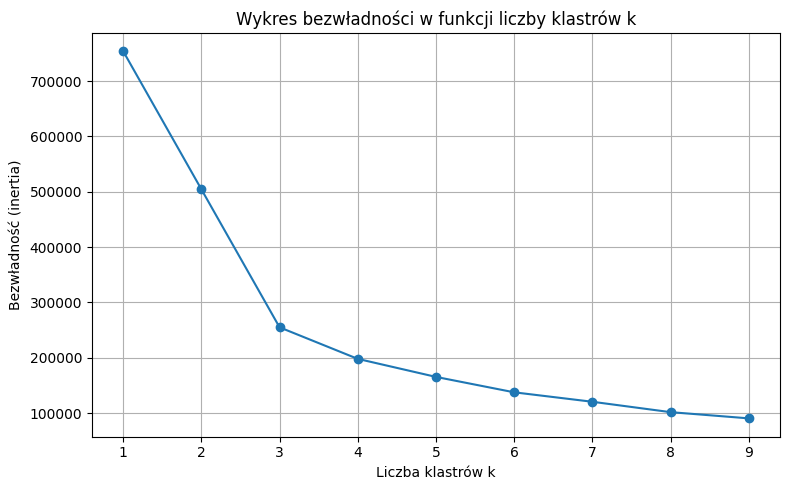

In [ ]:
# Lista do przechowywania wartości bezwładności
inertias = []

# Zakres liczby klastrów
k_values = range(1, 10)

# Oblicz bezwładność dla każdej wartości k
for k in k_values:
    pipeline = make_pipeline(
        StandardScaler(),
        PCA(n_components=2),
        KMeans(n_clusters=k, random_state=42)
    )
    pipeline.fit(df)
    # Pobierz model KMeans z pipeline
    kmeans_model = pipeline.named_steps['kmeans']
    inertias.append(kmeans_model.inertia_)

# Narysuj wykres
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertias, marker='o')
plt.title('Wykres bezwładności w funkcji liczby klastrów k')
plt.xlabel('Liczba klastrów k')
plt.ylabel('Bezwładność (inertia)')
plt.xticks(k_values)
plt.grid(True)
plt.tight_layout()
plt.show()

ValueError: x and y must have same first dimension, but have shapes (2,) and (9,)

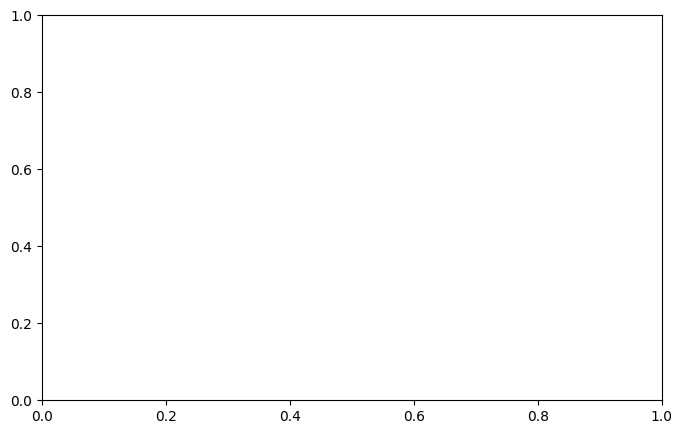

In [16]:
from sklearn.metrics import silhouette_score

# Lista do przechowywania wartości bezwładności
silhouettes = []

# Zakres liczby klastrów
k_values = range(1, 3)

# Oblicz bezwładność dla każdej wartości k
for k in k_values:
    pipeline = make_pipeline(
        StandardScaler(),
        PCA(n_components=2),
        KMeans(n_clusters=k, random_state=42)
    )
    pipeline.fit(df)
    # Pobierz model KMeans z pipeline
    kmeans_model = pipeline.named_steps['kmeans']
    silhouettes.append(silhouette_score(df,kmeans.labels_))

# Narysuj wykres
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertias, marker='o')
plt.title('Wykres bezwładności w funkcji liczby klastrów k')
plt.xlabel('Liczba klastrów k')
plt.ylabel('Wynik profilu')
plt.xticks(k_values)
plt.grid(True)
plt.tight_layout()
plt.show()

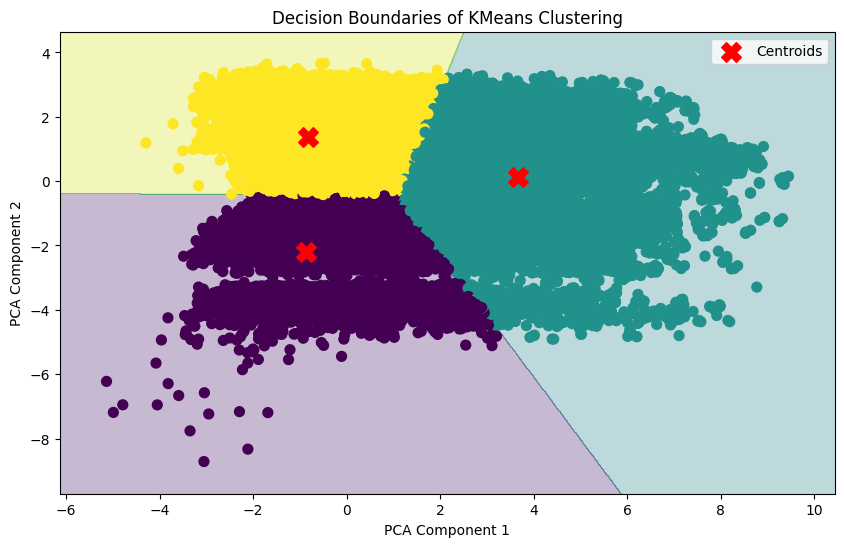

In [10]:

# Extract PCA and KMeans from the pipeline
scaler = k_means.named_steps['standardscaler']
pca = k_means.named_steps['pca']
kmeans = k_means.named_steps['kmeans']

# Transform the data
X_scaled = scaler.transform(df)
X_pca = pca.transform(X_scaled)

# Create a mesh grid
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict cluster labels for each point in the mesh
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundaries
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred, s=50, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=200, c='red', marker='X', label='Centroids')
plt.title("Decision Boundaries of KMeans Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()


<Axes: ylabel='Count'>

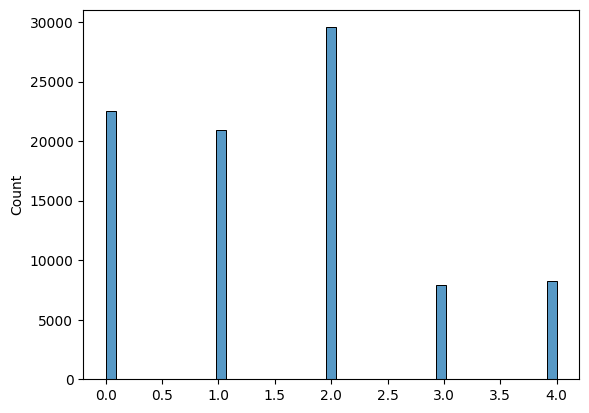

In [7]:
sns.histplot(y_pred)